In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    pos = _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)
    return pos

def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None, parsed = []):
    if pos is None:
        pos = {root:(xcenter,vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    children = list(G.neighbors(root))
    if not isinstance(G, nx.DiGraph) and parent is not None:
        children.remove(parent)  
    if len(children)!=0:
        dx = width/len(children) 
        nextx = xcenter - width/2 - dx/2
        for child in children:
            nextx += dx
            pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, vert_loc = vert_loc-vert_gap, xcenter=nextx, pos=pos, parent = root, parsed=parsed)
    return pos

In [4]:
G = nx.read_graphml("graph.graphml")

In [5]:
G.nodes

NodeView(('1.e4 e5 2.Nf3 Nc6 3.Bb5 Bc5 4.Nxe5', '1.e4 e5 2.Nf3 Nc6 3.Bb5 a6 4.Ba4 Nf6 5.d3', '1.e4 e5 2.Nf3 Nf6 3.Nxe5', '1.e4 e5 2.Nf3 Nc6 3.Bb5', '1.e4 e5 2.Nf3 Nc6 3.Bb5 d6 4.c3', '1.e4 e5 2.Nf3', '1.e4 e5 2.Nf3 Nf6 3.Nxe5 d6 4.Nf3', '1.e4 e5 2.Nf3 Nc6 3.Bb5 Nf6 4.O-O', '1.e4 e5 2.Nf3 Nc6 3.Bb5 a6 4.Ba4 Nf6 5.d3 b5 6.Bb3 Be7 7.a4', '1.e4 e5 2.Nf3 Nc6 3.Bb5 Nf6 4.O-O Nxe4 5.d4', '1.e4 e5 2.Nf3 d6 3.d4 exd4 4.Qxd4', '1.e4 e5 2.Nf3 Nf6 3.Nxe5 d6 4.Nf3 Nxe4 5.Bd3', '1.e4 e5 2.Nf3 Nc6 3.Bb5 a6 4.Ba4', '1.e4 e5 2.Nf3 d6 3.d4', '1.e4 e5 2.Nf3 Nc6 3.Bb5 a6 4.Ba4 Nf6 5.d3 b5 6.Bb3'))

In [6]:
G.nodes.get('1.e4 e5 2.Nf3 Nc6 3.Bb5 Bc5 4.Nxe5')

{'prob': 0.07838462979614938,
 'pgn': '1.e4 e5 2.Nf3 Nc6 3.Bb5 Bc5 4.Nxe5',
 'name': 'Bc5 4.Nxe5 0.07'}

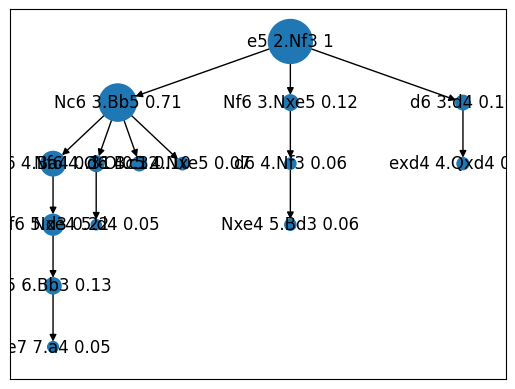

In [7]:
root_node = '1.e4 e5 2.Nf3'
pos = hierarchy_pos(G, root_node)

labels = nx.get_node_attributes(G, 'name')
node_sizes = nx.get_node_attributes(G, 'prob')
#each node's size is proportional to it's prob value
node_sizes = [node_sizes[node] * 1000 for node in G.nodes()]
nx.draw_networkx(G, pos, with_labels=True, labels=labels, node_size=node_sizes)
plt.show()

In [10]:
import json

# Load graph from .graphml file
G = nx.read_graphml('graph.graphml')

# Convert to a dictionary
data = nx.node_link_data(G)

# Save as .json
with open('graph.json', 'w') as f:
    json.dump(data, f)
